In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ydata_profiling as pp
import warnings
import seaborn as sns

#cleaning data libs
from sklearn import preprocessing

# machine learn libs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# reading the data
data_train = pd.read_csv('Data/train.csv')
data_test = pd.read_csv('Data/test.csv')

In [3]:
# Creating the Id to use on the export of the ML sets
ids = data_test['PassengerId']

In [4]:
# showing the 'train' file and variables
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [13]:
# showing the 'test' file and variables
# this is how the data should turn out and is not final
data_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [15]:
# using .describe() to show central tendency measures of the dataset
data_train.describe().transpose()

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [11]:
# percentage that survived within the train data
count = 0
for x in data_train['Survived']:
    if x == 1:
        count = count + 1
perc = (count * 100)/891
print(perc)

38.38383838383838


The Data:
 - This data do not represent ALL of the passengers abord the Titanic, this is roughly 1/3 of the total.
 - There are 891 rwos within the data, with 12 variables:
     - PassengerId: identification number
     - Survived: this is the output, saying if the passenger survived the incedent or not
     - Pclass goes from 1 to 3 and it is the kind of ticket bought by the passenger (1st classe, 2nd class, and so on)
     - Name: person's name
     - Sex: person's sex
     - Age: person's age
     - Sibsp: if the person had siblings or spouses
     - Parch: number of parents or sibling within the ship
     - Ticket: ticket number
     - Fare: ticket fare paid by the passenger
     - Cabin: cabin number that the passenger stayed in
     - Embarked: what platform the passenger entered the ship

Categorical variables:
 - Survived, Sex, Embarked, Pclass

Numerical variables:
 - Age, Fare, Sibsp, Parch
 
Nominal variable:
 - Name, Ticket, Cabin

In [4]:
# first analysis using the Profile Report Command
warnings.filterwarnings('ignore')
%matplotlib inline

pp.ProfileReport(data_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Univariate Analysis:

We can have a look at each of the numerical variables within the table below:

*insert central tendency measures here

Looking at this table we can see that:
 - Most of the variables have all of 891 values, except for the variable 'age'
 - Still about the 'age':
     - The minimum value that was encoutered here was 0.42, meaning that there were babies with less than 1 year old abord the ship
     - The average age of the passengers aboard the ship is 29 years old, meaning that most of the passengers were adults
         - This can be confirmed by looking at the graph, there is a concentration of passengers between 20 and 40 years
         - There is a surprisingly high number of children aboard
     - The oldest person within the data is 80 years old
     
 - Looking at the variable 'sex':
     - There were 577 (64.76%) males and 314 (35.24%) females
    
 - For 'Sibsp':
     - 68.2% of the passengers did not have sibling or spouses
     - The maximun number for this variable is 8, meaning that were some families aboard
     
 - The same can be seen within the variable 'Parch':
     - 76.1% (678 passengers) of the people aboard did not have siblings or parents within the ship


 - For 'Fare':
     - There is a maximum fare of 512, a big discrepancy compared to the rest of the data, most of which are around 0 and 60
     - This variable showed the greated standard deviation, which shows that some passengers paid much more than the others
     - The 1.7% of values represented by 0 were probably crew members
     
 - For 'Embarked':
     - 644 passengers used the platform S to embark, while 168 used C and 77 used Q, some explanation for the use of different platforms:
         - Platform Q and/or C could be a 'crew only' entrance.
         - Platform Q and or C could also be reserved for high value tickets

### Bivariate Analysis:
 - Some numerical variables are natural numbers (1, 2, 3...), making them hard to compare (SibSp, Parch)
 - The scater plots done within this analysis just show randomness with the data, they are not decisive
 - The correlation matrix and correlation table are important here:
     - As expected, we can see that SibSp and Parch have a high correlation (coefficient: 0.45), both show values for siblings, and spouses/parents
     - The Pclass and Fare are highly correlatable, as the "high class" tickets are more expensive
     - Pclass and Embarked variables have a coefficient of 0.26, meaning that the gate which people embarked could be based on the type of ticket they had (this was supposed with the univariate analysis)
     - Parch and Age have a high negative correlation. It could mean that the youngest the person, higher the chance of having parents
     - The output variable 'survived' have a 0.54 coefficiente, meaning that one sex had more people surviving (probably male because they represent almost 65% of the crew/passengers)

In [4]:
# cleaning the data
def clean(data_train):
    data_train = data_train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)

# filling the NaN in 'data_clean'
    cols = ['SibSp', 'Parch', 'Fare', 'Age']
    for x in cols:
        data_train[x].fillna(data_train[x].median(), inplace = True)

# filling the NaN in Embarked with 'U'
    data_train.Embarked.fillna('U', inplace = True)
    
# finishing the function    
    return data_train

data_train = clean(data_train)
data_test = clean(data_test)

data_train.head(5)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

Entendo que não é o melhor jeito de fazer inputação, mas esse não é o objetivo do projeto. Isso já está listado para ser desenvolvido em projetos futuros, mas esse projeto foi de maneira mais simples para viabilizar o modelo.

In [5]:
# substituting categorical values with numbers
label = preprocessing.LabelEncoder()

# specifing the columns we need to processes
columns = ['Sex', 'Embarked']

# processing
for x in columns:
    data_train[x] = label.fit_transform(data_train[x])
    data_test[x] = label.transform(data_test[x])
    print(label.classes_)
    
data_train.head(5)
# After the processing: male = 1, female = 0, C = 0, Q = 1, S = 2 and U = 3

['female' 'male']
['C' 'Q' 'S' 'U']


Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

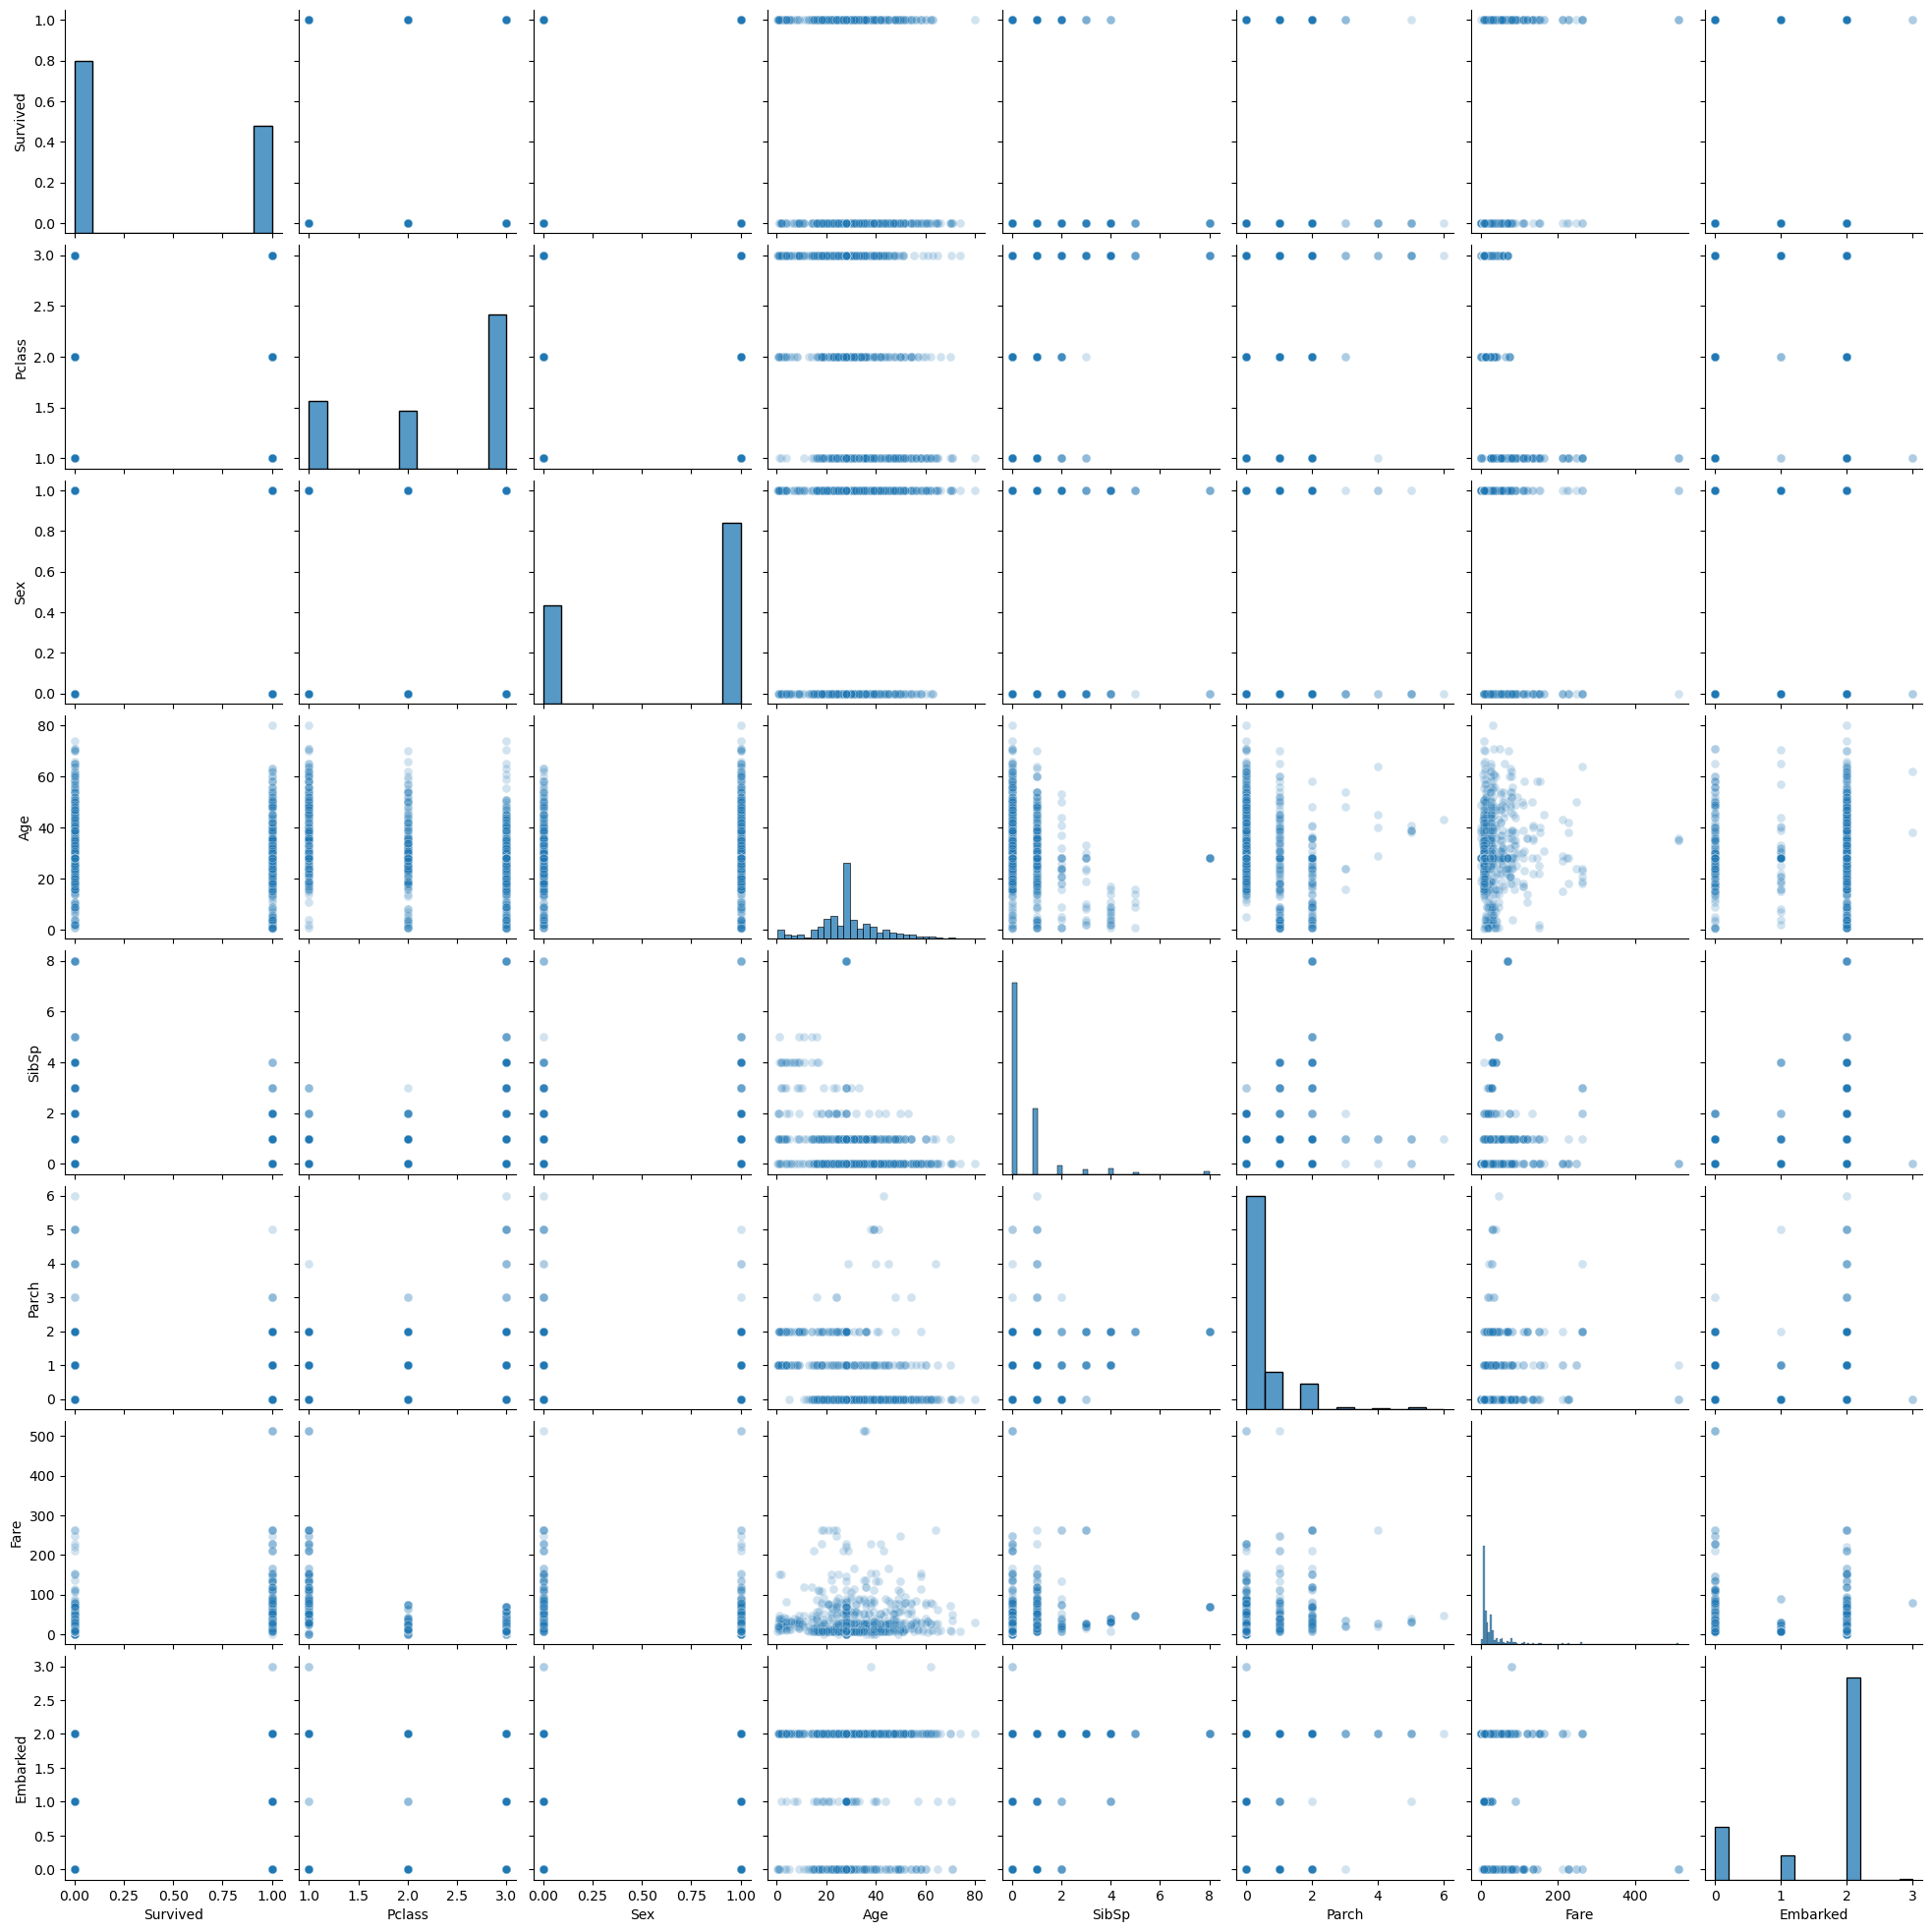

In [18]:
sns.pairplot(data_train, plot_kws = {'alpha': 0.2, 's': 40})

# Deconsiderar a base de teste e quebrar a base original em duas bases (uma de treino e uma de teste). Pegar 75% para treino e 25% para teste
pegar função para pegar as linhas aleatoriamente

treinar o modelo na base de treino

da base de teste será removido a coluna de output (e salvar ela separada para adicionar num futuro)

criar uma coluna de previsão em que o modelo vai falar o output

retornar a coluna do output e comparar com a coluan de previsão (usar uma matriz de confusão)


In [33]:
# defining x and y for the model
y = data_train['Survived']
X = data_train.drop('Survived', axis = 1)

# for the split:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# pesquisar o que é regressão logística e justificar se foi um modelo adequado ou não e se não foi, escolher outro modelo
considerar só regressões

In [34]:
# Training the model:
clf = LogisticRegression(random_state = 0, max_iter = 1000).fit(X_train, y_train)

In [35]:
# predictions
predict = clf.predict(X_val)

# accuracy
accuracy_score(y_val, predict)

0.8100558659217877

In [36]:
# submission
submission = clf.predict(data_test)

In [38]:
# Dataframe with the results
data_sub = pd.DataFrame({
    'PassengerId' : ids.values,
    'Survived' : submission
})

In [39]:
# creating a csv file
data_sub.to_csv('results.csv', index = False)